In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Koran,Revenue
0,2301.0,378.0,692,221000.0
1,445.0,393.0,451,104000.0
2,172.0,459.0,693,120000.0
3,1515.0,413.0,585,165000.0
4,1808.0,108.0,584,179000.0


In [3]:
df.describe(include='all')

,TV,Radio,Koran,Revenue
count,206.000000,206.000000,207.000000,205.000000
mean,1470.412621,230.703883,304.685990,151765.853659
std,860.018916,148.709160,216.685161,52610.330426
min,7.000000,0.000000,3.000000,16000.000000
25%,737.250000,99.250000,127.000000,110000.000000
50%,1497.500000,220.000000,256.000000,160000.000000
75%,2194.750000,364.500000,451.000000,192000.000000
max,2964.000000,496.000000,1140.000000,270000.000000


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       204 non-null    float64
 1   Radio    204 non-null    float64
 2   Koran    204 non-null    int64  
 3   Revenue  204 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.0 KB


In [7]:
df.isna().sum()

TV         0
Radio      0
Koran      0
Revenue    0
dtype: int64

In [6]:
df.dropna(inplace=True)


In [9]:
df.duplicated().sum()

4

In [10]:
df.drop_duplicates()

,TV,Radio,Koran,Revenue
0,2301.0,378.0,692,221000.0
1,445.0,393.0,451,104000.0
2,172.0,459.0,693,120000.0
3,1515.0,413.0,585,165000.0
4,1808.0,108.0,584,179000.0
...,...,...,...,...
202,382.0,37.0,138,76000.0
203,942.0,49.0,81,140000.0
204,1770.0,93.0,64,148000.0
205,2836.0,420.0,662,255000.0


# Uji Klasik And Data feature

/tmp/ipykernel_14204/2444092033.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Revenue,ax=ax[0])


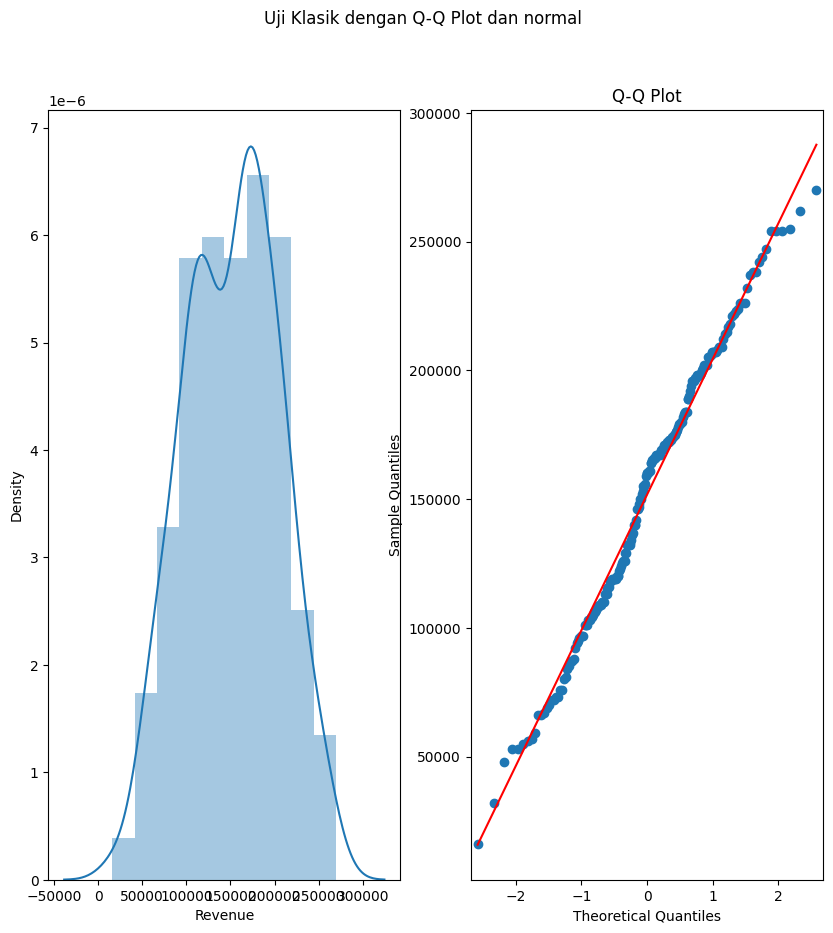

In [40]:
import seaborn as sns
import statsmodels.api as sm
fig,ax=plt.subplots(1,2,figsize=(10,10))
fig.suptitle("Uji Klasik dengan Q-Q Plot dan normal")

sns.distplot(df.Revenue,ax=ax[0])
plt.title('Normal Distribution')
sm.graphics.qqplot(df.Revenue,line='s',ax=ax[1])
plt.title('Q-Q Plot')

plt.show()

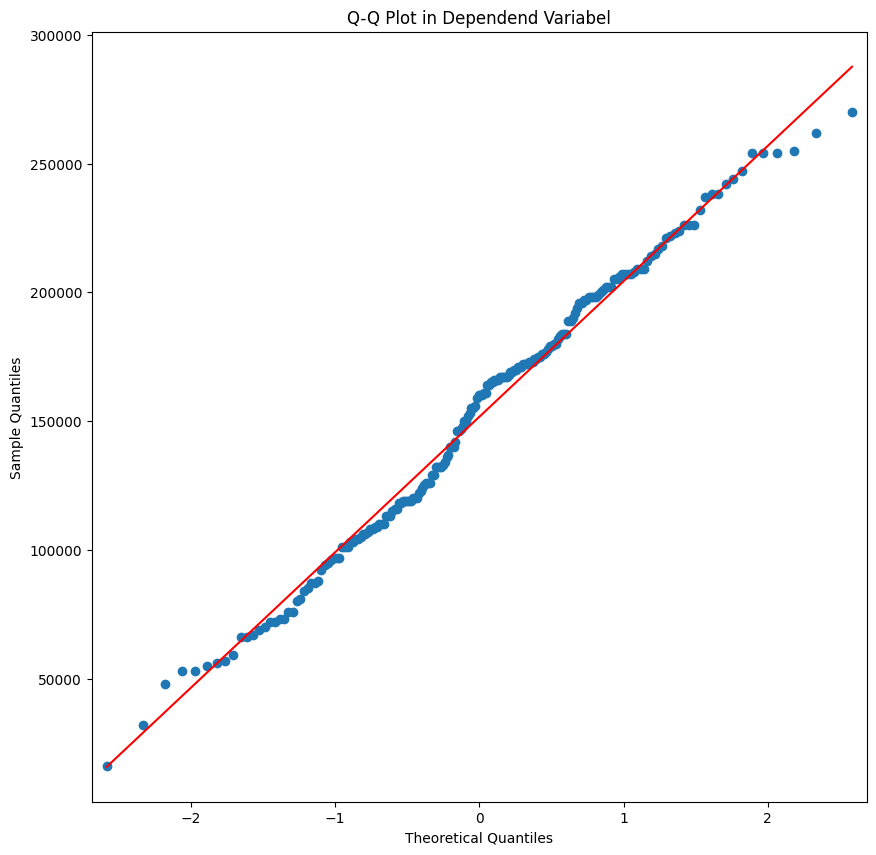

In [29]:
# uji q-q plot pada data

fig,ax=plt.subplots(figsize=(10,10))
sm.graphics.qqplot(df.Revenue,line='s',ax=ax)
ax.axes.set_title("Q-Q Plot in Dependend Variabel")
plt.show()